In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import os
import ast
from helpers import *


In [2]:
data_folder = "C:/Users/cricl/PROJADA/"

In [3]:
movie_col_name = [
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages", 
    "Movie_countries", 
    "Movie_genres",
    "Actor_gender",
    "Actor_height_m",
    "Actor_ethnicity",
    "Actor_name",
    "Actor_age_at_movie_release",
    "Main_genre",
    "Main_country"    ]

In [4]:
def remove_outlier(df, col_name,threshold):
    for i in df[col_name].unique():
        values = df[df[col_name]== i][col_name].value_counts()
        if values.values< threshold:
            df = df[df[col_name] != i]
    return df


In [5]:
df = pd.read_csv(data_folder+'Big_Cleaned_dataset.csv', usecols=movie_col_name)
threshold = 100
col_name = "Main_country"
df = remove_outlier(df,col_name,threshold)
America = ['Canada','United States of America','Mexico','Argentina','Brazil']
Europa= ['United Kingdom','France','Germany','Poland','Finland','Hungary','Spain','Italy','Finland',
'Ireland','Denmark','Sweden','Norway','Netherlands','Czech Republic', 'Switzerland','Portugal','Belgium', 'Austria','England']
Asia = ['India','Japan','Hong Kong','South Korea','Pakistan','Turkey','Philippines','Russia', 'Thailand', 'Malaysia', 'China',
       'Indonesia']
Africa = ['South Africa']
Oceania = ['Australia']
Deadcountries = ['Soviet Union','Yugoslavia','West Germany','Weimar Republic','Czechoslovakia', 'German Democratic Republic']
df = df[~df['Main_country'].isin(Deadcountries)]



In [6]:
#categorical_columns = ['Main_genre','Main_country','Actor_gender']
continent = [America,Asia,Europa,Africa,Oceania]
continent_str =["America","Asia","Europa","Africa","Oceania"]
for i in range(0,len(continent)):
    df.loc[df.Main_country.isin(continent[i]),'continent'] = continent_str[i]
df.head()

,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Actor_gender,Actor_height_m,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Main_genre,Main_country,continent
0,Ghosts of Mars,2001.0,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",F,1.620,NaN,Wanda De Jesus,42.0,Thriller,United States of America,America
1,Ghosts of Mars,2001.0,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",F,1.780,/m/044038p,Natasha Henstridge,27.0,Thriller,United States of America,America
2,Ghosts of Mars,2001.0,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",M,1.727,/m/0x67,Ice Cube,32.0,Thriller,United States of America,America
3,Ghosts of Mars,2001.0,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",M,1.750,NaN,Jason Statham,33.0,Thriller,United States of America,America
4,Ghosts of Mars,2001.0,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",F,1.650,NaN,Clea DuVall,23.0,Thriller,United States of America,America


In [7]:


threshold = 4700 #4700 for big one
col_name = "Main_genre"
df = remove_outlier(df,col_name,threshold)
test = df.Main_genre
a=test.value_counts()
print(a)

Main_genre
Thriller            30558
Drama               19208
Crime Fiction       16761
Romantic comedy     13803
Short Film           7288
Romance Film         7106
Action/Adventure     5800
Science Fiction      5432
Comedy               5424
Parody               4824
Name: count, dtype: int64


In [8]:
categorical_columns = ['Main_genre','continent','Actor_gender']
df = pd.get_dummies(df, columns=categorical_columns, drop_first= True)

df = df.drop(columns=['Movie_name','Movie_languages','Actor_name','Main_country','Movie_countries','Movie_genres','Actor_ethnicity'])
df.columns

Index(['Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Actor_height_m', 'Actor_age_at_movie_release', 'Main_genre_Comedy',
       'Main_genre_Crime Fiction', 'Main_genre_Drama', 'Main_genre_Parody',
       'Main_genre_Romance Film', 'Main_genre_Romantic comedy',
       'Main_genre_Science Fiction', 'Main_genre_Short Film',
       'Main_genre_Thriller', 'continent_America', 'continent_Asia',
       'continent_Europa', 'continent_Oceania', 'Actor_gender_M',
       'Actor_gender_Unknown'],
      dtype='object')

In [60]:
#1st analysis
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()d
# normalise only selected columns
#dfstand[cols] = sc.fit_transform(df[cols])
#df.columns = df.columns.str.replace(' ', '')

df.columns = df.columns.str.replace(' ', '')
dfstand=df
dfstand['Movie_release_date'] = (dfstand['Movie_release_date']- dfstand['Movie_release_date'].mean())/dfstand['Movie_release_date'].std()
dfstand['Movie_box_office_revenue'] = (dfstand['Movie_box_office_revenue']- dfstand['Movie_box_office_revenue'].mean())/dfstand['Movie_box_office_revenue'].std()
dfstand['Movie_runtime'] = (dfstand['Movie_runtime']- dfstand['Movie_runtime'].mean())/dfstand['Movie_runtime'].std()
dfstand.loc[dfstand['Actor_gender_M'] == 1, 'Actor_height_m'] = (dfstand.loc[dfstand['Actor_gender_M'] == 1, 'Actor_height_m']- dfstand.loc[dfstand['Actor_gender_M'] == 1, 'Actor_height_m'].mean()) / dfstand.loc[dfstand['Actor_gender_M'] == 1, 'Actor_height_m'].std()
dfstand.loc[dfstand['Actor_gender_M'] == 0, 'Actor_height_m'] = (dfstand.loc[dfstand['Actor_gender_M'] == 0, 'Actor_height_m']- dfstand.loc[dfstand['Actor_gender_M'] == 0, 'Actor_height_m'].mean()) / dfstand.loc[dfstand['Actor_gender_M'] == 0, 'Actor_height_m'].std()


dfstand= dfstand[df['Movie_box_office_revenue'].notna()]
dfstand= dfstand[df['Movie_runtime'].notna()]
dfstand= dfstand[df['Actor_height_m'].notna()]

C:\Users\cricl\AppData\Local\Temp\ipykernel_14996\3056940751.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfstand= dfstand[df['Movie_runtime'].notna()]
C:\Users\cricl\AppData\Local\Temp\ipykernel_14996\3056940751.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfstand= dfstand[df['Actor_height_m'].notna()]


In [82]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
dfstand['Actor_gender_M']=dfstand['Actor_gender_M'].astype(int)
mod = smf.logit(formula='Actor_gender_M ~  Movie_release_date * Movie_box_office_revenue  +Actor_height_m+ \
                       Actor_age_at_movie_release+ C(Main_genre_Comedy)+\
                       C(Main_genre_CrimeFiction)+C(Main_genre_Drama)+ C(Main_genre_Parody)+\
                       C(Main_genre_RomanceFilm)+C(Main_genre_Romanticcomedy)+\
                       C(Main_genre_ScienceFiction)+ C(Main_genre_ShortFilm)+\
                       C(Main_genre_Thriller)+C(continent_America)+ C(continent_Asia)+\
                       C(continent_Europa)+ C(continent_Oceania)', data=dfstand)
res = mod.fit()
dfstand['Propensity_score'] = res.predict()
print(res.summary())
dfstand.head()

Optimization terminated successfully.
         Current function value: 0.594526
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Actor_gender_M   No. Observations:                28990
Model:                          Logit   Df Residuals:                    28971
Method:                           MLE   Df Model:                           18
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                 0.07509
Time:                        15:00:24   Log-Likelihood:                -17235.
converged:                       True   LL-Null:                       -18634.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Actor_height_m,Actor_age_at_movie_release,Main_genre_Comedy,Main_genre_CrimeFiction,Main_genre_Drama,Main_genre_Parody,Main_genre_RomanceFilm,...,Main_genre_ShortFilm,Main_genre_Thriller,continent_America,continent_Asia,continent_Europa,continent_Oceania,Actor_gender_M,Actor_gender_Unknown,covariable,Propensity_score
0,0.655511,-0.440804,-0.093514,-0.650996,42.0,False,False,False,False,False,...,False,True,True,False,False,False,0,False,1,0.742606
1,0.655511,-0.440804,-0.093514,1.722123,27.0,False,False,False,False,False,...,False,True,True,False,False,False,0,False,1,0.523394
2,0.655511,-0.440804,-0.093514,-0.825369,32.0,False,False,False,False,False,...,False,True,True,False,False,False,1,False,1,0.646721
3,0.655511,-0.440804,-0.093514,-0.566731,33.0,False,False,False,False,False,...,False,True,True,False,False,False,1,False,1,0.651170
4,0.655511,-0.440804,-0.093514,-0.206036,23.0,False,False,False,False,False,...,False,True,True,False,False,False,0,False,1,0.527895


In [80]:
import networkx as nx
dftest = dfstand.sample(n=1000)
dftest.head()
control = dftest[dftest.Actor_gender_M == 0]
treat =  dftest[dftest.Actor_gender_M == 1 ]
def computediff(prop1,prop2):
    return np.abs(prop1-prop2)
def compute_similarity(prop1,prop2):
    return 1-np.abs(prop1-prop2)

G = nx.Graph()
for treat_id,treat_row in treat.iterrows():
    for control_id, control_row in control.iterrows():
        diff= computediff(control_row["Propensity_score"],treat_row["Propensity_score"])
        if (diff<0.05):
            similarity =  compute_similarity(control_row["Propensity_score"],treat_row["Propensity_score"])
            G.add_weighted_edges_from([(control_id, treat_id, similarity)])
matching = nx.max_weight_matching(G)
#matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
print("Number of successful matching:",len(matching))
print(matching)

Number of successful matching: 328
{(30062, 83706), (73608, 155815), (191279, 79628), (35880, 185170), (6648, 39277), (124279, 76271), (148135, 135997), (98308, 134643), (59192, 164048), (146982, 155131), (110213, 89892), (112859, 136685), (68506, 44723), (17803, 55246), (138061, 68133), (184415, 54425), (12212, 15417), (150947, 99752), (158326, 118278), (17423, 116865), (56954, 46716), (177313, 50131), (113392, 124968), (192331, 47048), (135802, 161309), (114745, 90030), (40899, 131803), (106966, 625), (54047, 44143), (194463, 156647), (68317, 57479), (185374, 113742), (11662, 35496), (149303, 46949), (76662, 100497), (8248, 101776), (98943, 183659), (138204, 67148), (184282, 123748), (152, 175650), (35972, 108998), (12209, 96724), (186796, 124943), (73507, 31591), (189306, 198226), (133962, 27426), (158925, 119220), (31162, 54059), (57424, 93939), (158423, 41695), (115264, 49658), (48190, 116348), (101202, 147466), (34650, 49210), (93958, 115896), (93713, 138202), (28668, 9488), (614

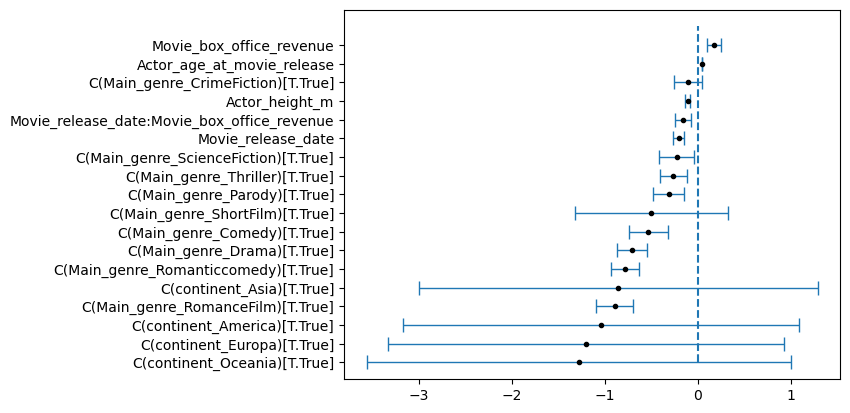

In [84]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))
plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);